# Using Team Totals to Improve Fantasy Football Player Selection
My aim is this project is to determine what if any significant relationship exists between the sports betting market's team point totals and a players fantasy points scored. 

Currently the fantasy football marketplace is flooded with ideas that sound correct, but have not been rigorously examined. This research is pertinent to fantasy football drafters who construct teams on a weekly basis during the NFL season. Knowing whether a variable like team point totals is significant to fantasy player points scored can make for better player selection in the weekly drafting process, which can lead to higher scoring teams and more money won throughout the season.

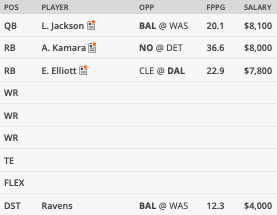

My anaylsis will focus exclusively on wide recievers (WR1 or WR2) and tight ends (TE). As can be seen in the image above, WRs and TEs make up at least 4 of the draft spots in a weekly Draftkings lineup and can account for as many as 5 spots. A WR or TE can be used in the "Flex" spot. So finding a variable that can improve 44%-55% of your lineup can have an immense impact on your bottomline.  

# Opening and Exploring the Data
Collecting sports data is very time consuming and expensive. An attempt was made to find a free dataset with a bigger sample size, but only costly alternative datasets were found. For this project I will be using my [personal fantasy football dataset](https://docs.google.com/spreadsheets/d/1uruqR7T2P3CyzHYB-aMfmMmVRX_pvHy0aVbSHpyma6k/edit?usp=sharing) compiled over the last 2 years. This dataset has over 2,100 data points and will be sufficient for this analysis. 

For this project only the 3 worksheets named ‘WR1’, ‘WR2’, and ‘TE’ will be used from the excel file. This dataset will allow me to explore questions like what variables have a significant impact on WRs and TEs fantasy points scored.

Let's start by opening the 3 worksheets and then continue with exploring the data.

In [1]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
wr1_df = pd.read_excel(r'/Users/tarrantcarter/Dropbox/antasy Sports/Fantasy Football 2020/Pass Catcher Model.xlsm', sheet_name='WR1')
wr2_df = pd.read_excel(r'/Users/tarrantcarter/Dropbox/antasy Sports/Fantasy Football 2020/Pass Catcher Model.xlsm', sheet_name='WR2')
te_df = pd.read_excel(r'/Users/tarrantcarter/Dropbox/antasy Sports/Fantasy Football 2020/Pass Catcher Model.xlsm', sheet_name='TE')

wr1_df.head()

,Pos,Player,Proj,WR TOP 10,TOT DEF,Thor Pace,Off PF,Def PF,#1 PC out,#2 PC out,...,Location,Spread,Tot,Salary,Fty Pts,Value,Game Date,Week,Team,Opponent
0,WR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,43.5,NaN,8.9,NaN,2018-10-14,Week 6,Arizona Cardinals,Minnesota Vikings
1,WR1,NaN,NaN,YES,YES,UP,NaN,NaN,NaN,NaN,...,NaN,-3.0,57.5,NaN,27.4,NaN,2018-10-14,Week 6,Atlanta Falcons,Tampa Bay Bucs
2,WR1,Michael Crabtree,11.8,YES,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.5,43.5,NaN,21.3,NaN,2018-10-14,Week 6,Baltimore Ravens,Tennessee Titans
3,WR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,40.5,NaN,12.5,NaN,2018-10-14,Week 6,Buffalo Bills,Houston Texans
4,WR1,NaN,NaN,NaN,NaN,DOWN,NaN,NaN,NaN,NaN,...,NaN,-1.0,44.5,NaN,13.4,NaN,2018-10-14,Week 6,Carolina Panthers,Washington Redskins


In [3]:
wr2_df.head()

,Pos,Player,Proj,WR TOP 10,TOT DEF,Thor Pace,Off PF,Def PF,#1 PC out,#2 PC out,...,Location,Spread,Tot,Salary,Fty Pts,Value,Game Date,Week,Team,Opponent
0,WR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,43.5,NaN,13.7,NaN,2018-10-14,Week 6,Arizona Cardinals,Minnesota Vikings
1,WR2,NaN,NaN,YES,YES,UP,NaN,NaN,NaN,NaN,...,NaN,-3.0,57.5,NaN,7.7,NaN,2018-10-14,Week 6,Atlanta Falcons,Tampa Bay Bucs
2,WR2,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.5,43.5,NaN,13.0,NaN,2018-10-14,Week 6,Baltimore Ravens,Tennessee Titans
3,WR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,40.5,NaN,0.2,NaN,2018-10-14,Week 6,Buffalo Bills,Houston Texans
4,WR2,NaN,NaN,NaN,NaN,DOWN,NaN,NaN,NaN,NaN,...,NaN,-1.0,44.5,NaN,9.7,NaN,2018-10-14,Week 6,Carolina Panthers,Washington Redskins


In [4]:
te_df.head()

,Pos,Player,Proj,WR TOP 10,TOT DEF,Thor Pace,Off PF,Def PF,#1 PC out,#2 PC out,...,Location,Spread,Tot,Salary,Fty Pts,Value,Game Date,Week,Team,Opponent
0,TE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,43.5,NaN,11.9,NaN,2018-10-14,Week 6,Arizona Cardinals,Minnesota Vikings
1,TE,NaN,NaN,YES,YES,UP,NaN,NaN,NaN,NaN,...,NaN,-3.0,57.5,NaN,22.1,NaN,2018-10-14,Week 6,Atlanta Falcons,Tampa Bay Bucs
2,TE,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.5,43.5,NaN,4.0,NaN,2018-10-14,Week 6,Baltimore Ravens,Tennessee Titans
3,TE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,40.5,NaN,0.0,NaN,2018-10-14,Week 6,Buffalo Bills,Houston Texans
4,TE,NaN,NaN,NaN,NaN,DOWN,NaN,NaN,NaN,NaN,...,NaN,-1.0,44.5,NaN,8.8,NaN,2018-10-14,Week 6,Carolina Panthers,Washington Redskins


All 3 worksheets have the same format. They all have the same 23 column headers. Let's concat the datasets and explore further.

In [5]:
concat = [wr1_df, wr2_df, te_df]

fb = pd.concat(concat)

fb.reset_index(inplace=True)

fb.info()

fb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2153 non-null   int64         
 1   Pos        2153 non-null   object        
 2   Player     330 non-null    object        
 3   Proj       203 non-null    float64       
 4   WR TOP 10  550 non-null    object        
 5   TOT DEF    374 non-null    object        
 6   Thor Pace  801 non-null    object        
 7   Off PF     0 non-null      float64       
 8   Def PF     0 non-null      float64       
 9   #1 PC out  108 non-null    object        
 10  #2 PC out  139 non-null    object        
 11  #3 PC out  138 non-null    object        
 12  Div        138 non-null    object        
 13  Conf       138 non-null    object        
 14  Location   137 non-null    object        
 15  Spread     2151 non-null   float64       
 16  Tot        2151 non-null   float64       


,index,Pos,Player,Proj,WR TOP 10,TOT DEF,Thor Pace,Off PF,Def PF,#1 PC out,...,Location,Spread,Tot,Salary,Fty Pts,Value,Game Date,Week,Team,Opponent
0,0,WR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,43.5,NaN,8.9,NaN,2018-10-14,Week 6,Arizona Cardinals,Minnesota Vikings
1,1,WR1,NaN,NaN,YES,YES,UP,NaN,NaN,NaN,...,NaN,-3.0,57.5,NaN,27.4,NaN,2018-10-14,Week 6,Atlanta Falcons,Tampa Bay Bucs
2,2,WR1,Michael Crabtree,11.8,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.5,43.5,NaN,21.3,NaN,2018-10-14,Week 6,Baltimore Ravens,Tennessee Titans
3,3,WR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,40.5,NaN,12.5,NaN,2018-10-14,Week 6,Buffalo Bills,Houston Texans
4,4,WR1,NaN,NaN,NaN,NaN,DOWN,NaN,NaN,NaN,...,NaN,-1.0,44.5,NaN,13.4,NaN,2018-10-14,Week 6,Carolina Panthers,Washington Redskins


Only the Pos, Spread, Tot, Fty Pts, Game Date, Week, Team, and Opponent columns contain over 2,000 non-null data points. The Spread, Tot, and Fty Pts columns are great candidates for further analysis. 

# Data Cleaning
## Part 1 - Dealing with Missing Values
As we saw in the previous cell with .info() we have lots of missing data. The Off PF and Def PF columns can be removed because they contain no values. The rest of the columns will be filled with relevent place holder variables so that these columns could be used for future exploration.

In [6]:
fb.drop(columns=['Off PF', 'Def PF'], inplace=True)
fb['Proj'].fillna(0, inplace=True)
fb['Player'].fillna('Unknown', inplace=True)
fb['WR TOP 10'].fillna('NO', inplace=True)
fb['TOT DEF'].fillna('NO', inplace=True)
fb['Thor Pace'].fillna('AVG', inplace=True)
fb['#1 PC out'].fillna('Unknown', inplace=True)
fb['#2 PC out'].fillna('Unknown', inplace=True)
fb['#3 PC out'].fillna('Unknown', inplace=True)
fb['Div'].fillna('Unknown', inplace=True)
fb['Conf'].fillna('Unknown', inplace=True)
fb['Location'].fillna('Unknown', inplace=True)
fb['Salary'].fillna('Unknown', inplace=True)
fb['Value'].fillna('Unknown', inplace=True)

fb.dropna(inplace=True)

fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2152
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2138 non-null   int64         
 1   Pos        2138 non-null   object        
 2   Player     2138 non-null   object        
 3   Proj       2138 non-null   float64       
 4   WR TOP 10  2138 non-null   object        
 5   TOT DEF    2138 non-null   object        
 6   Thor Pace  2138 non-null   object        
 7   #1 PC out  2138 non-null   object        
 8   #2 PC out  2138 non-null   object        
 9   #3 PC out  2138 non-null   object        
 10  Div        2138 non-null   object        
 11  Conf       2138 non-null   object        
 12  Location   2138 non-null   object        
 13  Spread     2138 non-null   float64       
 14  Tot        2138 non-null   float64       
 15  Salary     2138 non-null   object        
 16  Fty Pts    2138 non-null   float64       


We have dealt with all missing values from the dataset. Now we can move on to further cleaning. 

## Part 2 - Adding Useful Categories
We discovered earlier that the Spread, Tot, and Fty Pts columns will be the focus of our anaylsis. Let's look at the Spread and Tot columns to get an idea of how to incoporate them into our analysis.

In [7]:
print(stats.describe(fb['Spread']))
print(fb['Spread'].value_counts())

DescribeResult(nobs=2138, minmax=(-22.0, 22.0), mean=0.05355472404115996, variance=44.54895553771515, skewness=-0.0010615342215228483, kurtosis=0.09583758159769618)
-3.0     151
 3.0     151
-3.5     113
 3.5     112
-1.0      91
        ... 
-22.0      3
-18.0      3
 18.0      3
-8.0       3
 20.5      3
Name: Spread, Length: 70, dtype: int64


In [8]:
print(stats.describe(fb['Tot']))
print(fb['Tot'].value_counts())

DescribeResult(nobs=2138, minmax=(36.0, 63.5), mean=46.0633769878391, variance=21.644203284112216, skewness=0.37717261191713114, kurtosis=0.28421242881326236)
47.0    139
44.0    118
46.5    100
43.0     99
49.0     95
48.0     93
46.0     91
45.5     86
43.5     85
41.0     84
45.0     84
48.5     77
42.5     68
44.5     61
51.0     60
49.5     60
47.5     55
40.0     52
42.0     48
50.0     42
52.0     42
38.0     36
39.5     36
41.5     35
54.5     35
40.5     32
37.0     30
52.5     30
50.5     24
53.5     24
53.0     24
51.5     24
39.0     24
37.5     19
55.0     18
54.0     12
38.5     12
56.0     12
55.5     12
57.5     12
36.5     12
36.0      6
57.0      6
56.5      6
63.5      6
59.5      6
61.0      6
Name: Tot, dtype: int64


The problem is we will need to group the Spread and Tot columns into to usable categories for our anaylsis. Deciding which sports betting variable to focus on is a matter of taste. Fortunately we can create a metric that incoporates both. This metric is called team points totals, which is a common metric used in the fantasy football community. These values are derived by splitting the total points projected for the game (Tot column) and dividing that number in half as well as dividing in half the point spread (Spread column) for the game. The favored teams spread half gets added back to its halved total, while underdogs have their spread half subracted from their halved total. The result is a teams point total for that game. We will add a column that calculates this and explore the column.

In [9]:
fb['team total'] = (fb['Tot']/2)-(fb['Spread']/2)

print(stats.describe(fb['team total']))
print('STD = ',np.std(fb['team total']))

DescribeResult(nobs=2138, minmax=(11.25, 36.25), mean=23.00491113189897, variance=16.63573862101781, skewness=0.0273594405532522, kurtosis=-0.0320583195171098)
STD =  4.07773928046368


The mean is around 23 and the std is around 4. So we will make a new column with 4 categories and make intervals of 4 points between them where reasonable. We will start with 19-23, 23-27, 27+, and -19.

In [10]:
fb['TT Cat'] = 0
fb['TT Cat'][fb['team total'] >= 27] = '27+'
fb['TT Cat'][(fb['team total'] < 27) & (fb['team total'] >= 23)] = '23-27'
fb['TT Cat'][(fb['team total'] < 23) & (fb['team total'] >= 19)] = '19-23'
fb['TT Cat'][fb['team total'] < 19] = '-19'

In [11]:
fb.info()

fb['TT Cat'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2152
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       2138 non-null   int64         
 1   Pos         2138 non-null   object        
 2   Player      2138 non-null   object        
 3   Proj        2138 non-null   float64       
 4   WR TOP 10   2138 non-null   object        
 5   TOT DEF     2138 non-null   object        
 6   Thor Pace   2138 non-null   object        
 7   #1 PC out   2138 non-null   object        
 8   #2 PC out   2138 non-null   object        
 9   #3 PC out   2138 non-null   object        
 10  Div         2138 non-null   object        
 11  Conf        2138 non-null   object        
 12  Location    2138 non-null   object        
 13  Spread      2138 non-null   float64       
 14  Tot         2138 non-null   float64       
 15  Salary      2138 non-null   object        
 16  Fty Pts     2138 non-nul

23-27    738
19-23    697
27+      363
-19      340
Name: TT Cat, dtype: int64

In addition to the 4 team totals groups we will want to add a control group. To do this we will take a random sample of 20% of the dataset and then re-make our 4 team totals group with the remaining data. Then, we will make a new group column with the 5 different labels and concat our variables together into one dataframe.

In [12]:
#look at index from samples and remove from data set
control = fb.sample(frac=.2)
control.index

fb_new = fb.drop((control.index))

#check for proper size of our dataframes
print(fb.shape)
print(fb_new.shape)
print(control.shape)

(2138, 24)
(1710, 24)
(428, 24)


In [13]:
# make new 4 team total groups and name them as variables
high = fb_new.loc[fb['TT Cat'] == '27+']
aa = fb_new.loc[fb['TT Cat'] == '23-27']
ba = fb_new.loc[fb['TT Cat'] == '19-23']
low = fb_new.loc[fb['TT Cat'] == '-19']

In [14]:
# create new group column and concat our variables into one dataframe
high['group'] = 'high'
aa['group'] = 'aa'
ba['group'] = 'ba'
low['group'] = 'low'
control['group'] = 'control'

fb_concat = pd.concat([high,aa,ba,low,control], ignore_index=True)

fb_concat['group'].value_counts()

aa         578
ba         560
control    428
high       290
low        282
Name: group, dtype: int64

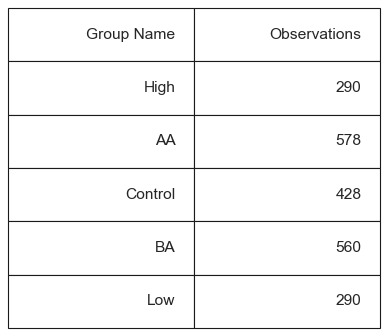

In [50]:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["Group Name", "Observations"],
    ["High", 290],
    ["AA", 578],
    ["Control", 428],
    ["BA", 560],
    ["Low", 290] 
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
#plt.title('Group', fontsize=12, color='red')
ax.axis('off')
plt.show()

We now have our data in 5 distinct categories with a control group. We are ready to proceed with analysis.

# Team Totals Analysis
## Part 1 - Normal or Not?
We will begin our analyis by plotting a distribution for the Fty Pts column and determining what type of distribution it follows. 

Text(0.5, 1.0, 'Distribution of Fantasy Points')

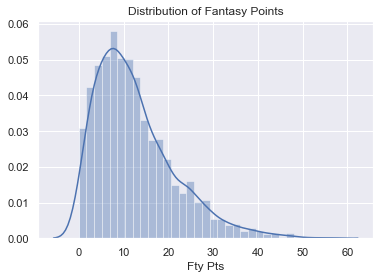

In [16]:
sns.distplot(fb_concat['Fty Pts'])
plt.title('Distribution of Fantasy Points')

In [17]:
print(stats.describe(fb_concat['Fty Pts']))
print(stats.shapiro(fb_concat['Fty Pts']))

DescribeResult(nobs=2138, minmax=(0.0, 56.7), mean=12.488802619270345, variance=78.8439814387952, skewness=1.1486902685643814, kurtosis=1.479815670973868)
(0.9209854006767273, 4.367228350522435e-32)


The Fty Pts column appears right on the fringe of normality. It does the fail the shapiro-wilks test, but the data visually appears normal with a positive skew. Additionaly, the skewness and kurtosis are very close to 1. I lean towards this being a normal distributon, but will explore this issue further by looking at a breakdown of our 5 groups. 

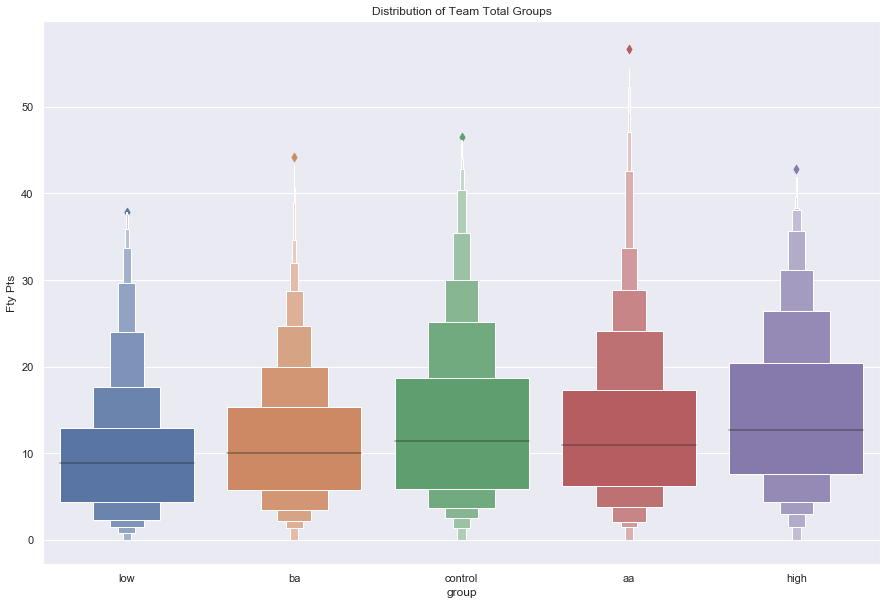

In [18]:
plt.figure(figsize=(15,10))
sns.boxenplot(x='group', y='Fty Pts', order=['low', 'ba', 'control','aa','high'],data=fb_concat)
plt.title('Distribution of Team Total Groups')
plt.show()

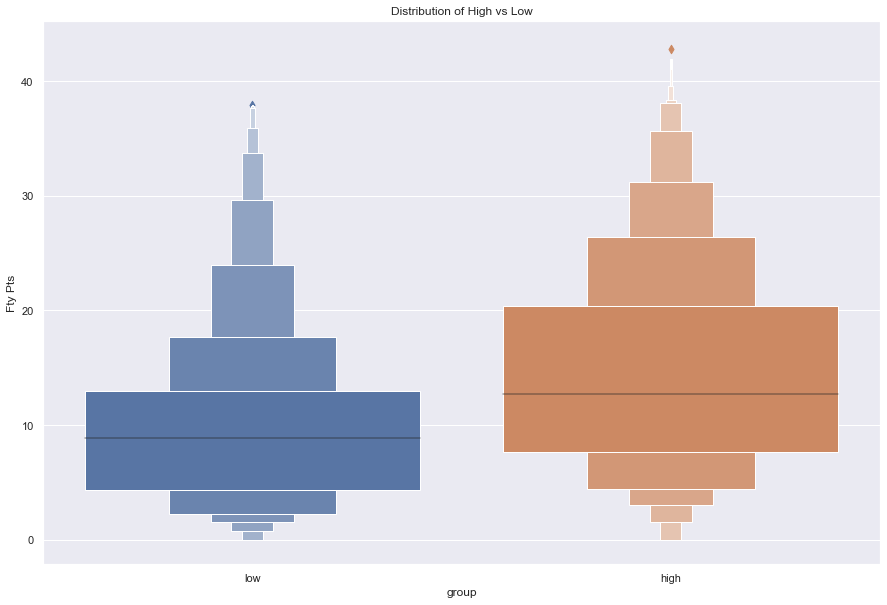

In [19]:
plt.figure(figsize=(15,10))
sns.boxenplot(x='group', y='Fty Pts', order=['low', 'high'],data=fb_concat)
plt.title('Distribution of High vs Low')
plt.show()

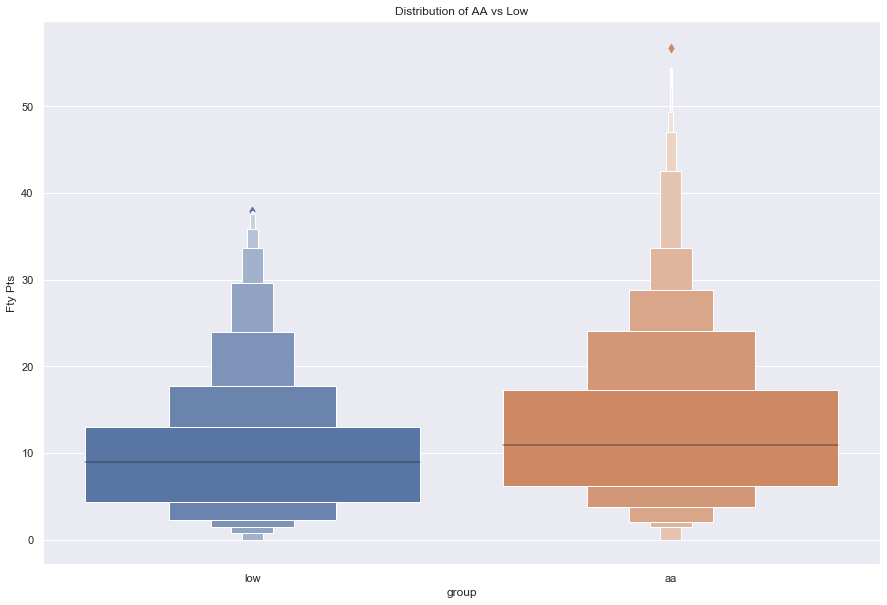

In [20]:
plt.figure(figsize=(15,10))
sns.boxenplot(x='group', y='Fty Pts', order=['low', 'aa'],data=fb_concat)
plt.title('Distribution of AA vs Low')
plt.show()

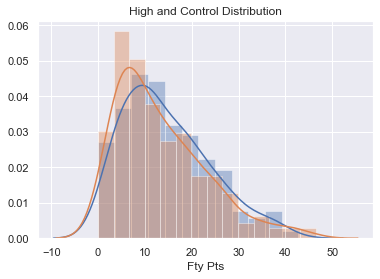

In [21]:
sns.distplot(high['Fty Pts'])
sns.distplot(control['Fty Pts'])

plt.title('High and Control Distribution')

plt.show()

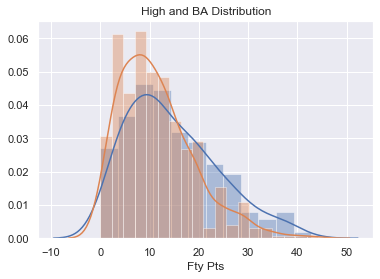

In [22]:
sns.distplot(high['Fty Pts'])
sns.distplot(ba['Fty Pts'])

plt.title('High and BA Distribution')

plt.show()

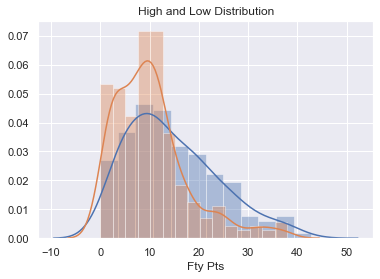

In [23]:
sns.distplot(high['Fty Pts'])
sns.distplot(low['Fty Pts'])

plt.title('High and Low Distribution')

plt.show()

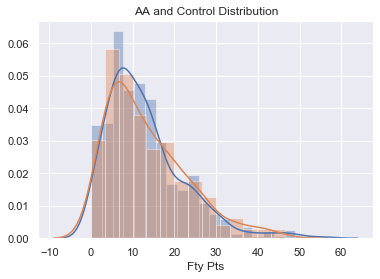

In [24]:
sns.distplot(aa['Fty Pts'])
sns.distplot(control['Fty Pts'])

plt.title('AA and Control Distribution')
plt.show()

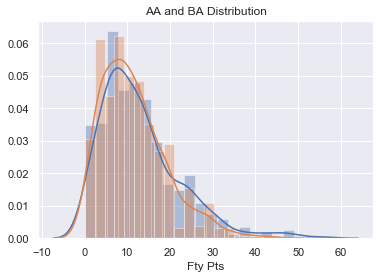

In [25]:
sns.distplot(aa['Fty Pts'])
sns.distplot(ba['Fty Pts'])

plt.title('AA and BA Distribution')
plt.show()

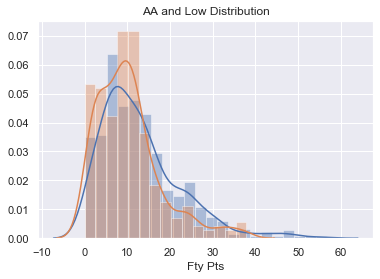

In [26]:
sns.distplot(aa['Fty Pts'])
sns.distplot(low['Fty Pts'])

plt.title('AA and Low Distribution')
plt.show()

In [30]:
print("High - ",stats.describe(high['Fty Pts']))
print("AA - ",stats.describe(aa['Fty Pts']))
print("BA - ",stats.describe(ba['Fty Pts']))
print("Low - ",stats.describe(low['Fty Pts']))
print("Control - ",stats.describe(control['Fty Pts']))

High -  DescribeResult(nobs=290, minmax=(0.0, 42.8), mean=14.582758620689654, variance=86.36785672354134, skewness=0.6902118270315266, kurtosis=-0.11258401735371848)
AA -  DescribeResult(nobs=578, minmax=(0.0, 56.7), mean=12.949809688581315, variance=88.88267951311221, skewness=1.34862629243682, kurtosis=2.3821943195485025)
BA -  DescribeResult(nobs=560, minmax=(0.0, 44.2), mean=11.400125, variance=58.56591572674419, skewness=1.0188613959432795, kurtosis=1.161527074577025)
Low -  DescribeResult(nobs=282, minmax=(0.0, 37.9), mean=10.195106382978722, variance=57.2959802377527, skewness=1.2969232060699456, kurtosis=1.9513658673610985)
Control -  DescribeResult(nobs=428, minmax=(0.0, 46.5), mean=13.383130841121494, variance=92.55598033881242, skewness=0.9980739025727189, kurtosis=0.6356009337049295)


In [32]:
print("High - ",stats.shapiro(high['Fty Pts']))
print("AA - ",stats.shapiro(aa['Fty Pts']))
print("BA - ",stats.shapiro(ba['Fty Pts']))
print("Low - ",stats.shapiro(low['Fty Pts']))
print("Control - ",stats.shapiro(control['Fty Pts']))

High -  (0.9544326066970825, 7.34860989837216e-08)
AA -  (0.9029586315155029, 1.0685773510998372e-18)
BA -  (0.9361780285835266, 9.584200668071984e-15)
Low -  (0.8993310928344727, 9.18438177073544e-13)
Control -  (0.9230225086212158, 5.292188331985047e-14)


In [33]:
print("High - ",np.std(high['Fty Pts']))
print("AA - ",np.std(aa['Fty Pts']))
print("BA - ",np.std(ba['Fty Pts']))
print("Low - ",np.std(low['Fty Pts']))
print("Control - ",np.std(control['Fty Pts']))

High -  9.277393843528632
AA -  9.419602074980594
BA -  7.6460011597157775
Low -  7.555977964689087
Control -  9.60935627647873


We see the same trend between groups like we saw with the overall Fty Pts column. The distribuition seems positively skewed, the skewness and kurtosis is a little over 1 mostly, while all groups fail the shapiro-wilks test, but all standard deviations are close to each other. 

Because the data visually appears normal with a positive skew and the standard devations between groups are close together, we will treat this dataset as normally distributed. 

## Part 2 - Significance Testing
Because we have more than one comparison group, we will use a one-way anova to test for significance between our groups. 

In [34]:
stats.f_oneway(high['Fty Pts'], aa['Fty Pts'], ba['Fty Pts'], low['Fty Pts'], control['Fty Pts'])

F_onewayResult(statistic=12.582626783683521, pvalue=4.034654986290835e-10)

Since we have a p value of less than 0.001 we can confidently reject the null hypothesis. There is a significant difference between team point totals and fantasy points scored. To further explore this relationship for the the inter-group significance we will use the Tukey HSD test. 

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = fb_concat['Fty Pts'], groups= fb_concat['group'], alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
aa,ba,-1.5497,0.0247,-2.9717,-0.1276,True
aa,control,0.4333,0.9,-1.0961,1.9627,False
aa,high,1.6329,0.074,-0.0929,3.3588,False
aa,low,-2.7547,0.001,-4.4968,-1.0126,True
ba,control,1.983,0.0041,0.4432,3.5228,True
ba,high,3.1826,0.001,1.4475,4.9177,True
ba,low,-1.205,0.3292,-2.9562,0.5462,False
control,high,1.1996,0.3774,-0.6245,3.0237,False
control,low,-3.188,0.001,-5.0275,-1.3486,True
high,low,-4.3877,0.001,-6.3934,-2.3819,True


We see some interesting results with our Tukey test. The teams with the highest team totals (High group) mean differences were signifcant when compared to all 4 groups. The above average group mean differences were sigificant when compared to the below average and low group, but not when compared to the control group. 

## Part 3 - Visualizing Meaningful Differences
Next we will look at confidence intervals for each of our 6 significant group pairings. We will plot the average group fantasy point values next to each other to better illustrate the difference between the groups. The first step will be to write a function to calcualte confidence intervals.

In [36]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval is between "+str(round(ci_lower,2))+" points and "+str(round(ci_upper,2))+" points.")

Recall that the high group's mean difference is signifcant vs the Control, Below Average, and Low groups and not significant vs the Above Average group. Next, we will illustrate the differences vs each group and provide confidence intervals for each pairing. 

In [37]:
#high group vs control group confidence levels and mean difference
print(get_95_ci(control['Fty Pts'], high['Fty Pts']))
print("The high group's mean is",round(high['Fty Pts'].mean()-control['Fty Pts'].mean(),2), "points higher than the control group's.")

The difference in means at the 95% confidence interval is between -0.21 points and 2.6 points.
The high group's mean is 1.2 points higher than the control group's.


In [38]:
#high group vs below average group confidence levels and mean difference
print(get_95_ci(ba['Fty Pts'], high['Fty Pts']))
print("The high group's mean is",round(high['Fty Pts'].mean()-ba['Fty Pts'].mean(),2), "points higher than the below average group's.")

The difference in means at the 95% confidence interval is between 1.94 points and 4.43 points.
The high group's mean is 3.18 points higher than the below average group's.


In [39]:
#high group vs low group confidence levels and mean difference
print(get_95_ci(low['Fty Pts'], high['Fty Pts']))
print("The high group's mean is",round(high['Fty Pts'].mean()-low['Fty Pts'].mean(),2), "points higher than the low group's.")

The difference in means at the 95% confidence interval is between 3.0 points and 5.77 points.
The high group's mean is 4.39 points higher than the low group's.


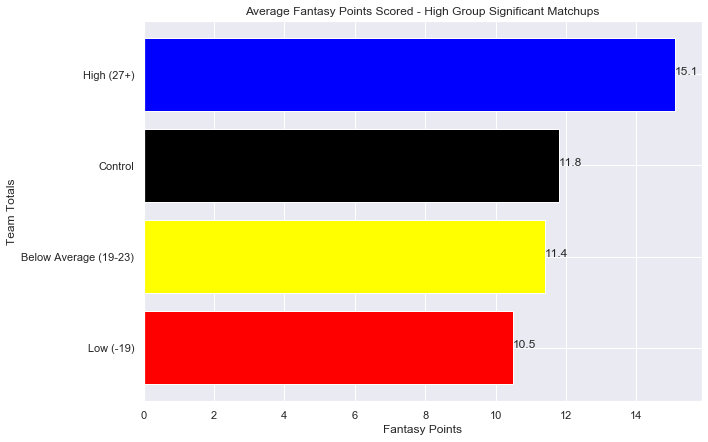

In [40]:
#bar plot of means between all groups
plt.figure(figsize=(10,7))

x = ["Low (-19)",'Below Average (19-23)','Control', "High (27+)"]
y = [10.5,11.4,11.8,15.1]
plt.barh(x,y,color=['red','yellow','black','blue'])
plt.xlabel('Fantasy Points')
plt.ylabel('Team Totals')
plt.title("Average Fantasy Points Scored - High Group Significant Matchups")

for index, value in enumerate(y):
    plt.text(value, index, str(value))

Text(0.5, 1.0, 'High vs Control - CI of Mean Differences')

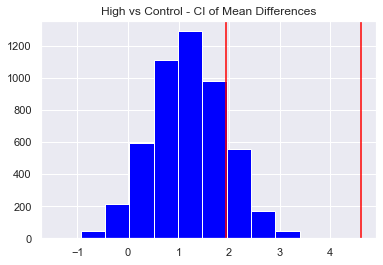

In [41]:
high_sample = [high['Fty Pts'].sample(len(high['Fty Pts']), replace=True).mean() for _ in range(5000)]
control_sample = [control['Fty Pts'].sample(len(control['Fty Pts']), replace=True).mean() for _ in range(5000)]

diff = pd.Series(high_sample) - pd.Series(control_sample)
lower = 1.94
upper = 4.6
plt.hist(diff,color='blue')
plt.axvline(x=lower,color='red')
plt.axvline(x=upper,color='red')
plt.title("High vs Control - CI of Mean Differences")

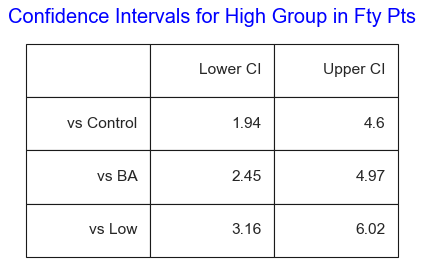

In [42]:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["", 'Lower CI','Upper CI'],
    ["vs Control", 1.94, 4.6],
    ["vs BA", 2.45, 4.97],
    ["vs Low", 3.16,6.02],
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
plt.title('Confidence Intervals for High Group in Fty Pts', fontsize=18, color='blue')
ax.axis('off')
plt.show()

The above average group's mean difference were signifcant vs the control, below average, low groups, but not the high group. Next, we will illustrate the differences vs each group and provide confidence intervals for each pairing.

In [43]:
print(get_95_ci(control['Fty Pts'], aa['Fty Pts']))
print("The aa group's mean is",round(high['Fty Pts'].mean()-control['Fty Pts'].mean(),2), "points higher than the control group's.")

The difference in means at the 95% confidence interval is between -1.63 points and 0.76 points.
The aa group's mean is 1.2 points higher than the control group's.


In [44]:
#above average group vs below average group confidence levels and mean difference
print(get_95_ci(ba['Fty Pts'], aa['Fty Pts']))
print("The above average group's mean is",round(aa['Fty Pts'].mean()-ba['Fty Pts'].mean(),2), "points higher than the below average group's.")

The difference in means at the 95% confidence interval is between 0.55 points and 2.55 points.
The above average group's mean is 1.55 points higher than the below average group's.


In [45]:
#above average group vs low group confidence levels and mean difference
print(get_95_ci(low['Fty Pts'], aa['Fty Pts']))
print("The above average group's mean is",round(aa['Fty Pts'].mean()-low['Fty Pts'].mean(),2), "points higher than the low group's.")

The difference in means at the 95% confidence interval is between 1.58 points and 3.93 points.
The above average group's mean is 2.75 points higher than the low group's.


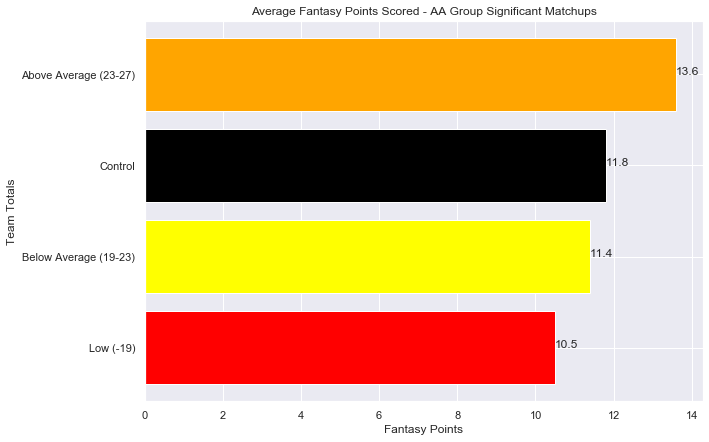

In [46]:
#bar plot of means between all groups
plt.figure(figsize=(10,7))

x = ["Low (-19)",'Below Average (19-23)','Control', 'Above Average (23-27)']
y = [10.5,11.4,11.8,13.6]
plt.barh(x,y,color=['red','yellow','black','orange'])
plt.xlabel('Fantasy Points')
plt.ylabel('Team Totals')
plt.title("Average Fantasy Points Scored - AA Group Significant Matchups")

for index, value in enumerate(y):
    plt.text(value, index, str(value))

0.6


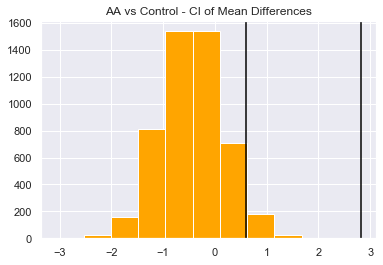

In [47]:
aa_sample = [aa['Fty Pts'].sample(len(aa['Fty Pts']), replace=True).mean() for _ in range(5000)]
control_sample = [control['Fty Pts'].sample(len(control['Fty Pts']), replace=True).mean() for _ in range(5000)]

diff = pd.Series(aa_sample) - pd.Series(control_sample)
lower = 0.6
upper = 2.82
plt.hist(diff, color='orange')
plt.axvline(x=lower,color='black')
plt.axvline(x=upper,color='black')
plt.title("AA vs Control - CI of Mean Differences")

print(lower)

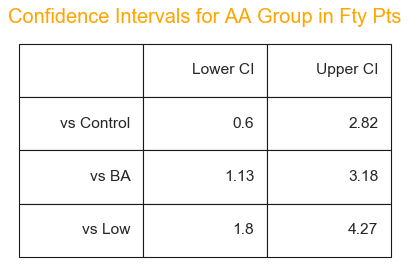

In [48]:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["", 'Lower CI','Upper CI'],
    ["vs Control", 0.6, 2.82],
    ["vs BA", 1.13, 3.18],
    ["vs Low", 1.8, 4.27],
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
plt.title('Confidence Intervals for AA Group in Fty Pts', fontsize=18, color='orange')
ax.axis('off')
plt.show()

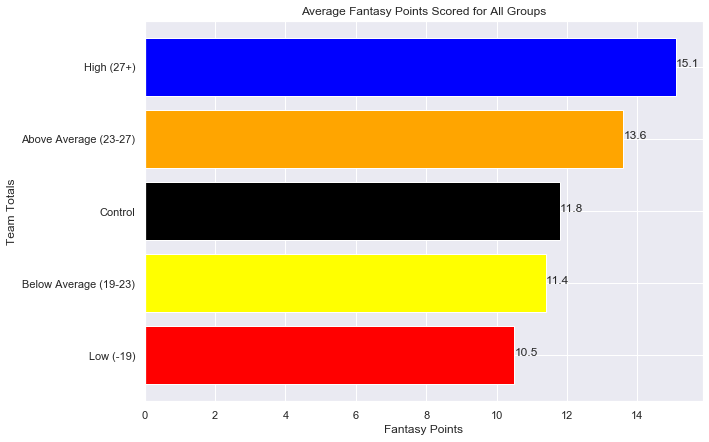

In [49]:
#bar plot of means between all groups
plt.figure(figsize=(10,7))

x = ["Low (-19)",'Below Average (19-23)','Control','Above Average (23-27)', "High (27+)"]
y = [10.5,11.4,11.8,13.6,15.1]
plt.barh(x,y,color=['red','yellow','black','orange','blue'])
plt.xlabel('Fantasy Points')
plt.ylabel('Team Totals')
plt.title("Average Fantasy Points Scored for All Groups")

for index, value in enumerate(y):
    plt.text(value, index, str(value))

## Part 4 - Conclusions
The key takeaway for fantasy football drafters is to prioritize wide receiver and tight end selections on teams with high (27+) and above average (23-27) team totals. You will get significantly higher scoring players than average by doing so. 

Focusing player selection on pass catchers with team totals higher than 23 points will lead to higher scoring lineups on average, which will lead to more winning teams and more money won through out the football season. 